TODO
- test on both classifier and regression

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")


In [7]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from dtreeviz import trees 

import graphviz
import pandas as pd
from dtreeviz.shadow import ShadowDecTree
from dtreeviz.shadow2 import ShadowDecTree2
from dtreeviz.models.shadow_decision_tree import ShadowDecTree3
from dtreeviz.models.sklearn_decision_trees import SKDTree
from dtreeviz import treeviz
from dtreeviz import trees

# Classifier

In [6]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"
dtc = DecisionTreeClassifier(max_depth=3, random_state=random_state)
dtc.fit(dataset[features], dataset[target])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

## Check shadow tree creation

In [2]:
#??dtc.tree_

In [6]:
dtc.tree_.value[1][0]

array([ 81., 233.])

In [7]:
target

'Survived'

In [112]:
shadow = ShadowDecTree(dtc, dataset[features], dataset[target], feature_names=features, class_names=list(dtc.classes_))

In [113]:
shadow2 = ShadowDecTree2(dtc, dataset[features], dataset[target], feature_names=features, class_names=list(dtc.classes_))


## children left

In [14]:
sk_tree = SKDTree(dtc)

In [15]:
sk_tree.get_children_left()

array([ 1,  2,  3, -1, -1,  6, -1, -1,  9, 10, -1, -1, 13, -1, -1])

In [16]:
sk_tree.get_children_right()

array([ 8,  5,  4, -1, -1,  7, -1, -1, 12, 11, -1, -1, 14, -1, -1])

## prediction path

In [11]:
x = dataset[features].iloc[1]
x

Pclass             1.0000
Age               38.0000
Fare              71.2833
Sex_label          0.0000
Cabin_label       81.0000
Embarked_label     0.0000
Name: 1, dtype: float64

In [14]:
prediction, path = shadow.predict(x)
print(prediction)

1


In [16]:
[node.id for node in path]

[0, 1, 2, 4]

## node split/threshold value

In [10]:
[node.split() for node in shadow2.internal]

[2.5, 23.350000381469727, 2.5, 3.5, 17.5, 3.5, 0.5]

In [11]:
[node.split() for node in shadow2.leaves]

[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]

In [12]:
dtc.tree_.threshold

array([ 0.5       ,  2.5       ,  2.5       , -2.        , -2.        ,
       23.35000038, -2.        , -2.        ,  3.5       ,  3.5       ,
       -2.        , -2.        , 17.5       , -2.        , -2.        ])

## node features

In [38]:
[node.feature() for node in shadow2.internal]


[1, 2, 0, 1, 1, 4, 3]

In [39]:
[node.feature() for node in shadow2.leaves]


[-2, -2, -2, -2, -2, -2, -2, -2]

In [13]:
shadow.feature_names, shadow2.feature_names

(['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label'],
 ['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label'])

## node to sample

In [130]:
shadow2.node_to_samples

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [46]:
shadow2.node_to_samples[4]

[1,
 3,
 9,
 11,
 15,
 31,
 41,
 43,
 52,
 53,
 56,
 58,
 61,
 66,
 84,
 88,
 98,
 123,
 133,
 136,
 151,
 161,
 166,
 177,
 190,
 194,
 195,
 199,
 211,
 215,
 218,
 230,
 237,
 247,
 256,
 257,
 258,
 259,
 268,
 269,
 272,
 275,
 290,
 291,
 299,
 303,
 306,
 307,
 309,
 310,
 311,
 312,
 316,
 318,
 319,
 322,
 323,
 325,
 327,
 329,
 334,
 337,
 341,
 345,
 346,
 356,
 357,
 366,
 369,
 375,
 380,
 383,
 387,
 389,
 393,
 399,
 412,
 416,
 417,
 426,
 427,
 432,
 435,
 437,
 440,
 443,
 446,
 457,
 458,
 472,
 473,
 486,
 496,
 498,
 504,
 506,
 513,
 516,
 518,
 520,
 523,
 526,
 535,
 537,
 539,
 540,
 546,
 556,
 558,
 571,
 576,
 577,
 580,
 581,
 585,
 591,
 596,
 600,
 608,
 609,
 615,
 618,
 627,
 635,
 641,
 651,
 669,
 670,
 689,
 700,
 706,
 708,
 710,
 716,
 717,
 720,
 726,
 730,
 742,
 747,
 750,
 754,
 759,
 763,
 765,
 772,
 774,
 779,
 781,
 796,
 801,
 809,
 820,
 829,
 835,
 842,
 849,
 853,
 854,
 856,
 862,
 865,
 866,
 871,
 874,
 879,
 880,
 887]

## Node samples

In [36]:
dtc.tree_.n_node_samples

array([891, 314, 170,   2, 168, 144, 117,  27, 577, 473,  14, 459, 104,
         8,  96])

In [47]:
[leaf.nsamples() for leaf in shadow2.leaves], [node.nsamples() for node in shadow2.internal]

([2, 168, 117, 27, 14, 459, 8, 96], [170, 144, 314, 473, 104, 577, 891])

In [48]:
[leaf.nsamples() for leaf in shadow2.leaves], [node.nsamples() for node in shadow2.internal]

([2, 168, 117, 27, 14, 459, 8, 96], [170, 144, 314, 473, 104, 577, 891])

In [49]:
type(shadow2.X_train)

numpy.ndarray

## n_sample_classes

In [78]:
[leaf.n_sample_classes() for leaf in shadow2.internal]

[(9, 161), (72, 72), (81, 233), (409, 64), (59, 45), (468, 109), (549, 342)]

In [90]:
[leaf.n_sample_classes() for leaf in shadow2.leaves]

[(1, 1), (8, 160), (48, 69), (24, 3), (5, 9), (404, 55), (0, 1), (59, 37)]

In [80]:
[leaf.nsamples() for leaf in shadow2.leaves]

[2, 168, 117, 27, 14, 459, 8, 96]

In [81]:
np.unique([1,1,1,1,1], return_counts=True)

(array([1]), array([5]))

In [88]:
unique, counts = np.unique([0,0,0,0,1,1,1], return_counts=True)

In [89]:
len(unique)

2

In [14]:
shadow.class_names, shadow2.class_names

({0: 0, 1: 1}, {0: 0, 1: 1})

In [15]:
print(dtc.class_weight)

None


In [16]:
print(shadow.class_weight)
print(shadow2.class_weight)

None
None


In [17]:
print(shadow.y_train)
print(shadow2.y_train)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [18]:
shadow.node_to_samples

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [19]:
shadow2.node_to_samples

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

In [20]:
shadow.leaves[1].prediction(), shadow2.leaves[1].prediction()

(1, 1)

In [21]:
shadow.internal[0].class_counts(), shadow2.internal[0].class_counts()

(array([  9, 161]), array([  9, 161]))

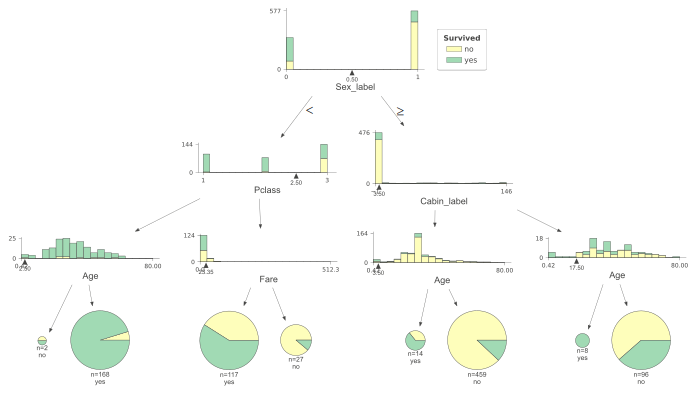

In [22]:
# TODO
# - need to find a way to call this function in an easier way, ex. get class_name from dtc.classes_ inside the function 
trees.dtreeviz(dtc, dataset[features], dataset[target], feature_names=features, target_name=target, class_names=["no", "yes"])

In [23]:
len(shadow.leaves), len(shadow2.leaves)

(8, 8)

In [24]:
[node.id for node in shadow.internal], [node.id for node in shadow2.internal]

([2, 5, 1, 9, 12, 8, 0], [2, 5, 1, 9, 12, 8, 0])

In [25]:
[node.nsamples() for node in shadow.internal], [node.nsamples() for node in shadow2.internal]

([170, 144, 314, 473, 104, 577, 891], [170, 144, 314, 473, 104, 577, 891])

In [26]:
[node.nsamples() for node in shadow.leaves], [node.nsamples() for node in shadow2.leaves]

([2, 168, 117, 27, 14, 459, 8, 96], [2, 168, 117, 27, 14, 459, 8, 96])

In [27]:
[node.isclassifier() for node in shadow.leaves], [node.isclassifier() for node in shadow2.leaves]

([array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True]),
  array([ True])],
 [True, True, True, True, True, True, True, True])

In [28]:
[node.isleaf() for node in shadow.leaves], [node.isleaf() for node in shadow2.leaves]

([True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True])

In [29]:
shadow.internal[1].split_samples(), shadow2.internal[1].split_samples()

((array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  29,
          30,  31,  32,  33,  35,  37,  39,  40,  41,  42,  43,  44,  45,
          48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
          61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
          74,  75,  76,  77,  79,  81,  82,  84,  85,  86,  87,  88,  90,
          91,  92,  93,  94,  97,  98,  99, 100, 101, 102, 103, 105, 106,
         110, 111, 112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124,
         125, 126, 127, 129, 131, 133, 134, 135, 136, 137, 138, 140, 141]),
  array([  8,  18,  24,  28,  34,  36,  38,  46,  47,  78,  80,  83,  89,
          95,  96, 104, 107, 108, 109, 116, 123, 128, 130, 132, 139, 142,
         143])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  19,  20,  21,  22,  23,  25,  26,  27,  29,
          30,  31, 

In [30]:
shadow.internal[0].isclassifier(), shadow2.internal[0].isclassifier()

(array([ True]), True)

In [31]:
def print_node_info(index, node_type : ("internal", "leaf")):
    if node_type == "leaf":
        node, node2 = shadow.leaves[index], shadow2.leaves[index]
    elif node_type == "internal":
        node, node2 = shadow.internal[index], shadow2.internal[index]

    print(f"node id {node.id}, {node2.id}")
    print(f"node split {node.split()}, {node2.split()}")
    print(f"node feature index {node.feature()}, {node2.feature()}")
    print(f"node feature name {node.feature_name()}, {node2.feature_name()}")
    print(f"node feature samples {node.samples()}, {node2.samples()}")

    

In [32]:
print_node_info(0, node_type="internal")
print_node_info(1, node_type="internal")

node id 2, 2
node split 2.5, 2.5
node feature index 1, 1
node feature name Age, Age
node feature samples [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 98, 123, 133, 136, 151, 161, 166, 177, 190, 194, 195, 199, 211, 215, 218, 230, 237, 247, 256, 257, 258, 259, 268, 269, 272, 275, 290, 291, 297, 299, 303, 306, 307, 309, 310, 311, 312, 316, 318, 319, 322, 323, 325, 327, 329, 334, 337, 341, 345, 346, 356, 357, 366, 369, 375, 380, 383, 387, 389, 393, 399, 412, 416, 417, 426, 427, 432, 435, 437, 440, 443, 446, 457, 458, 472, 473, 486, 496, 498, 504, 506, 513, 516, 518, 520, 523, 526, 530, 535, 537, 539, 540, 546, 556, 558, 571, 576, 577, 580, 581, 585, 591, 596, 600, 608, 609, 615, 618, 627, 635, 641, 651, 669, 670, 689, 700, 706, 708, 710, 716, 717, 720, 726, 730, 742, 747, 750, 754, 759, 763, 765, 772, 774, 779, 781, 796, 801, 809, 820, 829, 835, 842, 849, 853, 854, 856, 862, 865, 866, 871, 874, 879, 880, 887], [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 9

In [33]:
print_node_info(0, node_type="leaf")
print_node_info(1, node_type="leaf")

node id 3, 3
node split -2.0, -2.0
node feature index -2, -2
node feature name Cabin_label, Cabin_label
node feature samples [297, 530], [297, 530]
node id 4, 4
node split -2.0, -2.0
node feature index -2, -2
node feature name Cabin_label, Cabin_label
node feature samples [1, 3, 9, 11, 15, 31, 41, 43, 52, 53, 56, 58, 61, 66, 84, 88, 98, 123, 133, 136, 151, 161, 166, 177, 190, 194, 195, 199, 211, 215, 218, 230, 237, 247, 256, 257, 258, 259, 268, 269, 272, 275, 290, 291, 299, 303, 306, 307, 309, 310, 311, 312, 316, 318, 319, 322, 323, 325, 327, 329, 334, 337, 341, 345, 346, 356, 357, 366, 369, 375, 380, 383, 387, 389, 393, 399, 412, 416, 417, 426, 427, 432, 435, 437, 440, 443, 446, 457, 458, 472, 473, 486, 496, 498, 504, 506, 513, 516, 518, 520, 523, 526, 535, 537, 539, 540, 546, 556, 558, 571, 576, 577, 580, 581, 585, 591, 596, 600, 608, 609, 615, 618, 627, 635, 641, 651, 669, 670, 689, 700, 706, 708, 710, 716, 717, 720, 726, 730, 742, 747, 750, 754, 759, 763, 765, 772, 774, 779, 781, 7

In [34]:
shadow.nclasses(), shadow2.nclasses()

(2, 2)

In [35]:
shadow.nnodes(), shadow2.nnodes()

(15, 15)

In [39]:
shadow.leaf_sample_counts(), shadow2.leaf_sample_counts()

AttributeError: 'ShadowDecTree2' object has no attribute 'leaf_sample_counts'

In [40]:
shadow.isclassifier(), shadow2.isclassifier()

(array([ True]), True)

In [43]:
shadow.node_samples(dtc, dataset[features])

defaultdict(list,
            {0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19,
              20,
              21,
              22,
              23,
              24,
              25,
              26,
              27,
              28,
              29,
              30,
              31,
              32,
              33,
              34,
              35,
              36,
              37,
              38,
              39,
              40,
              41,
              42,
              43,
              44,
              45,
              46,
              47,
              48,
              49,
              50,
              51,
              52,
              53,
              54,

## Visualizations

In [9]:
sk_dtree = SKDTree(dtc, dataset[features], dataset[target], features, target, [0, 1])

### viz_leaf_samples

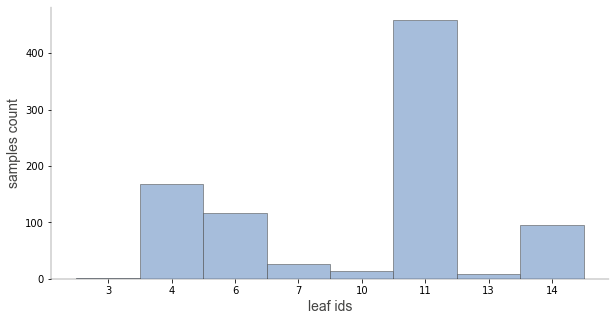

In [10]:
# this method was implemented with an issue...it display only leaf samples for trained model, not for a given dataset
trees.viz_leaf_samples(dtc)

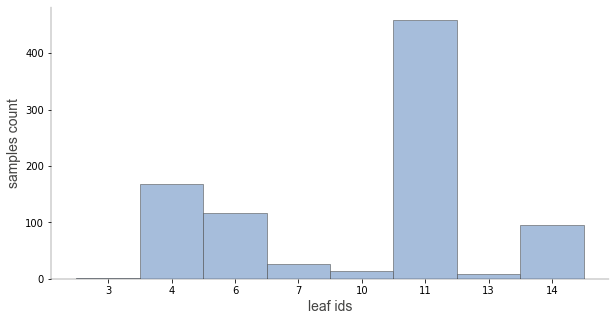

In [16]:
treeviz.viz_leaf_samples(dtc, dataset[features], dataset[target], features, target)

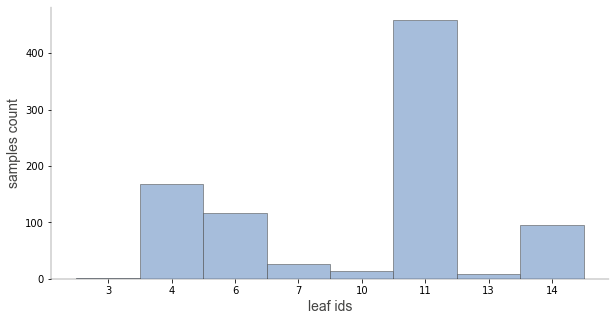

In [14]:
treeviz.viz_leaf_samples(sk_dtree)

### ctreeviz_leaf_samples

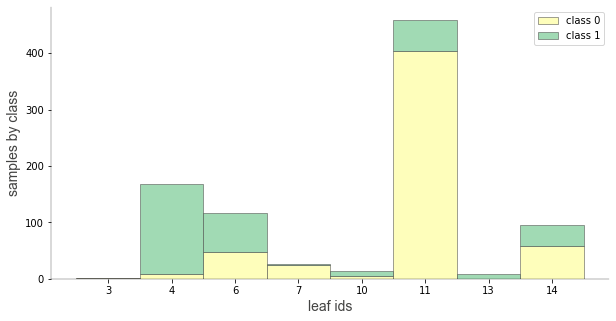

In [17]:
trees.ctreeviz_leaf_samples(dtc, dataset[features], dataset[target])

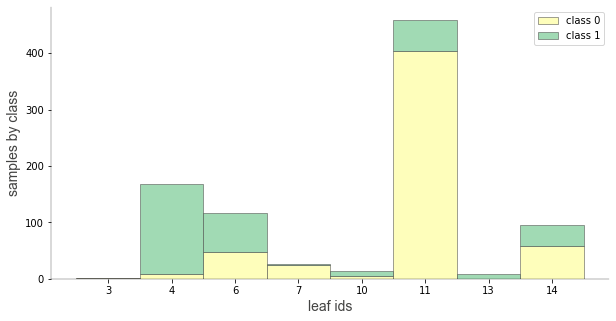

In [19]:
treeviz.ctreeviz_leaf_samples(dtc, dataset[features], dataset[target], features, target, class_names=[0, 1])

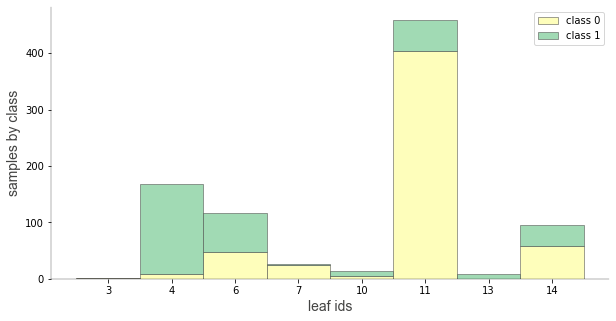

In [18]:
treeviz.ctreeviz_leaf_samples(sk_dtree)

### dtreeviz

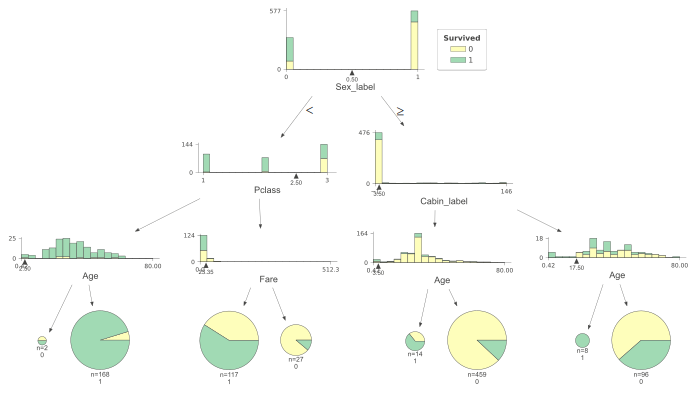

In [11]:
trees.dtreeviz(dtc, dataset[features], dataset[target], features, target, [0,1])

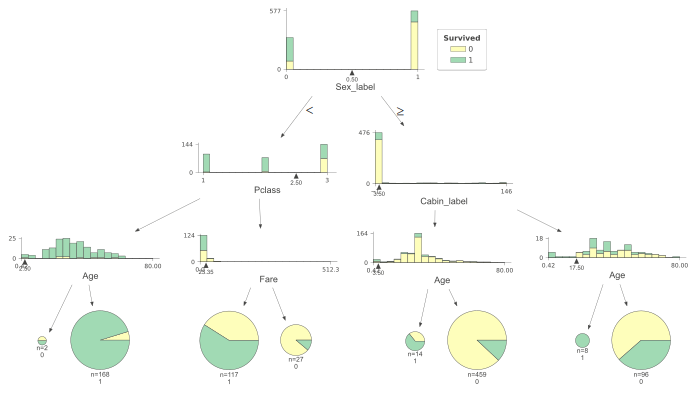

In [12]:
treeviz.dtreeviz(dtc, dataset[features], dataset[target], features, target, class_names=[0, 1])

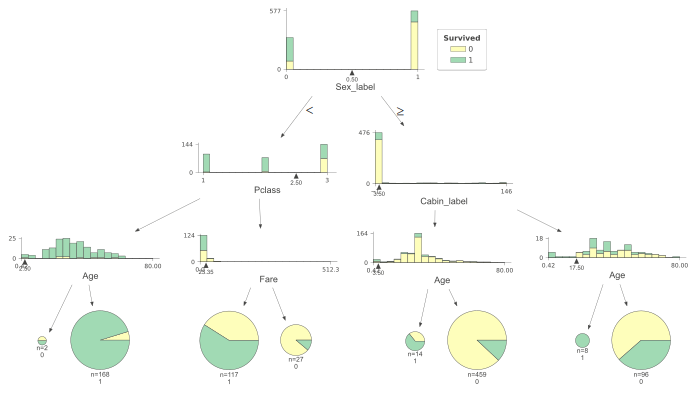

In [15]:
treeviz.dtreeviz(sk_dtree, fancy=True)

### viz_leaf_criterion

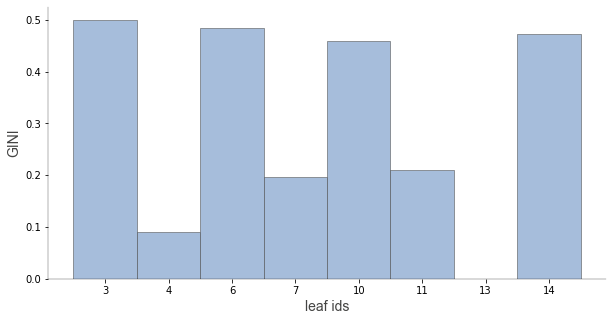

In [23]:
trees.viz_leaf_criterion(dtc)

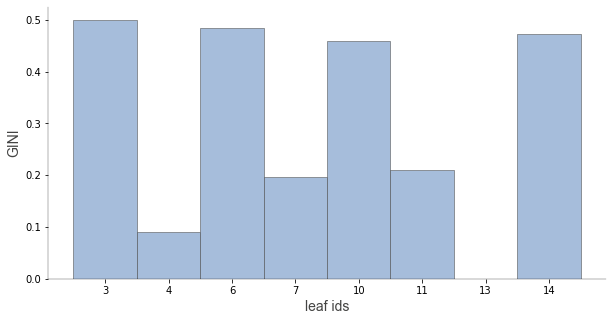

In [25]:
treeviz.viz_leaf_criterion(dtc, dataset[features], dataset[target], features, target)

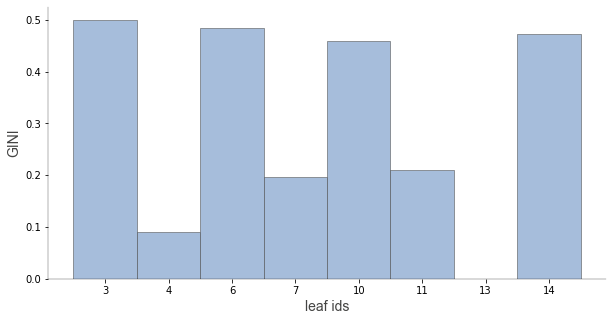

In [24]:
treeviz.viz_leaf_criterion(sk_dtree)

### describe_node_sample

In [26]:
trees.describe_node_sample(dtc, dataset[features], 10)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,14.000000,14.000000,14.000000,14.0,14.0,14.000000
mean,2.642857,1.553571,26.489886,1.0,-1.0,1.642857
std,0.497245,0.928726,11.353636,0.0,0.0,0.744946
min,2.000000,0.420000,8.516700,1.0,-1.0,0.000000
25%,2.000000,0.872500,18.750000,1.0,-1.0,2.000000
50%,3.000000,1.000000,25.037500,1.0,-1.0,2.000000
75%,3.000000,2.000000,35.600025,1.0,-1.0,2.000000
max,3.000000,3.000000,46.900000,1.0,-1.0,2.000000


In [31]:
treeviz.describe_node_sample(dtc, 10, dataset[features], dataset[target], feature_names=features)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,14.000000,14.000000,14.000000,14.0,14.0,14.000000
mean,2.642857,1.553571,26.489886,1.0,-1.0,1.642857
std,0.497245,0.928726,11.353636,0.0,0.0,0.744946
min,2.000000,0.420000,8.516700,1.0,-1.0,0.000000
25%,2.000000,0.872500,18.750000,1.0,-1.0,2.000000
50%,3.000000,1.000000,25.037500,1.0,-1.0,2.000000
75%,3.000000,2.000000,35.600025,1.0,-1.0,2.000000
max,3.000000,3.000000,46.900000,1.0,-1.0,2.000000


In [27]:
treeviz.describe_node_sample(sk_dtree, 10)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,14.000000,14.000000,14.000000,14.0,14.0,14.000000
mean,2.642857,1.553571,26.489886,1.0,-1.0,1.642857
std,0.497245,0.928726,11.353636,0.0,0.0,0.744946
min,2.000000,0.420000,8.516700,1.0,-1.0,0.000000
25%,2.000000,0.872500,18.750000,1.0,-1.0,2.000000
50%,3.000000,1.000000,25.037500,1.0,-1.0,2.000000
75%,3.000000,2.000000,35.600025,1.0,-1.0,2.000000
max,3.000000,3.000000,46.900000,1.0,-1.0,2.000000


### explain_prediction_path

In [206]:
dataset[features].iloc[2]

Pclass             3.000
Age               26.000
Fare               7.925
Sex_label          0.000
Cabin_label       -1.000
Embarked_label     2.000
Name: 2, dtype: float64

In [259]:
trees.explain_prediction_path(dtc, dataset[features].iloc[2], features=features, explanation_type="plain_english")

2.5 <= Pclass
Fare < 23.35
Sex_label < 0.5


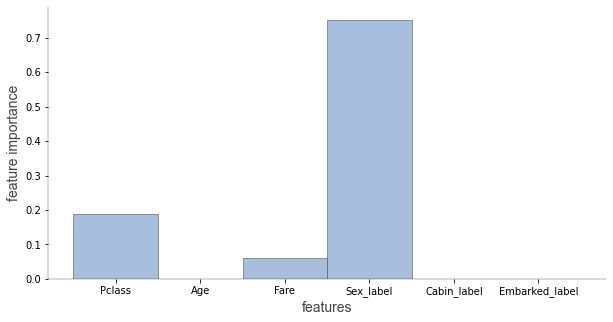

In [260]:
trees.explain_prediction_path(dtc, dataset[features].iloc[2], features=features, explanation_type="sklearn_default")

In [35]:
treeviz.explain_prediction_path(dtc, dataset[features].iloc[2], "plain_english", dataset[features], dataset[target], features, target)

2.5 <= Pclass
Fare < 23.35
Sex_label < 0.5


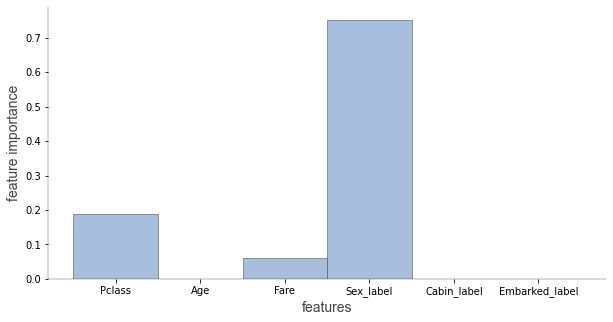

In [36]:
treeviz.explain_prediction_path(dtc, dataset[features].iloc[2], "sklearn_default", dataset[features], dataset[target], features, target)

In [37]:
treeviz.explain_prediction_path(sk_dtree, dataset[features].iloc[2], explanation_type="plain_english")

2.5 <= Pclass
Fare < 23.35
Sex_label < 0.5


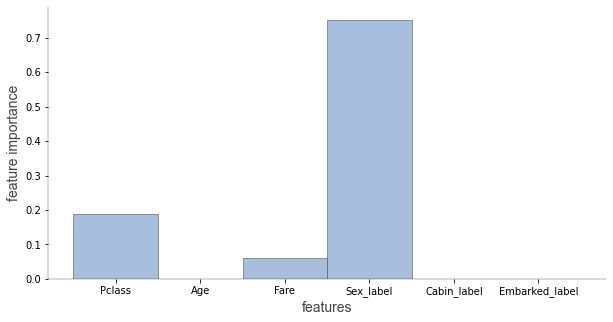

In [38]:
treeviz.explain_prediction_path(sk_dtree, dataset[features].iloc[2], explanation_type="sklearn_default")

# Regressor

In [44]:
features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
target_reg = "Age"
dtr = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr.fit(dataset[features_reg], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [46]:
sk_dtree_reg = SKDTree(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

## Visualizations

### dtreeviz

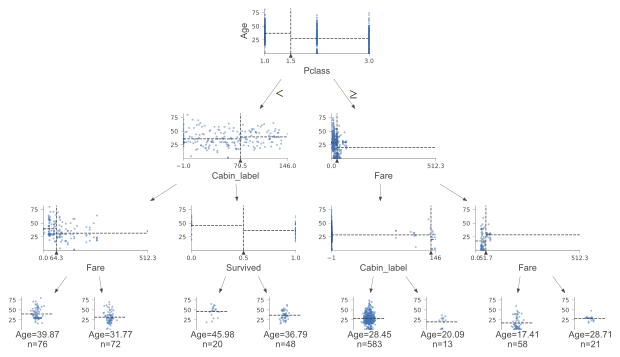

In [45]:
treeviz.dtreeviz(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

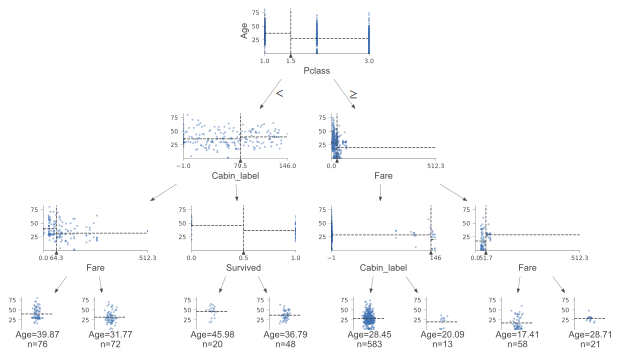

In [47]:
treeviz.dtreeviz(sk_dtree_reg)

#### show just path

In [51]:
dataset[features_reg].iloc[10]

Pclass              3.0
Fare               16.7
Sex_label           0.0
Cabin_label       145.0
Embarked_label      2.0
Survived            1.0
Name: 10, dtype: float64

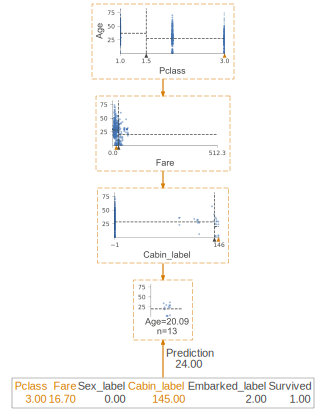

In [49]:
treeviz.dtreeviz(sk_dtree_reg, show_just_path=True, X = dataset[features_reg].iloc[10])

### viz_leaf_samples

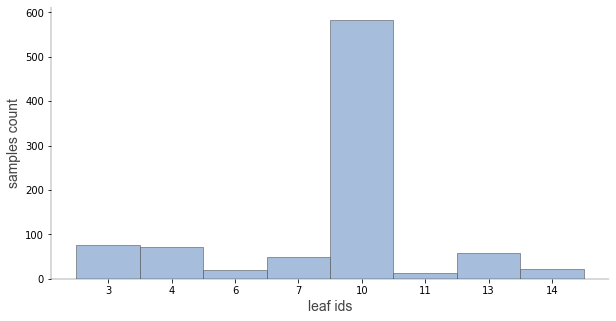

In [53]:
treeviz.viz_leaf_samples(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg, )

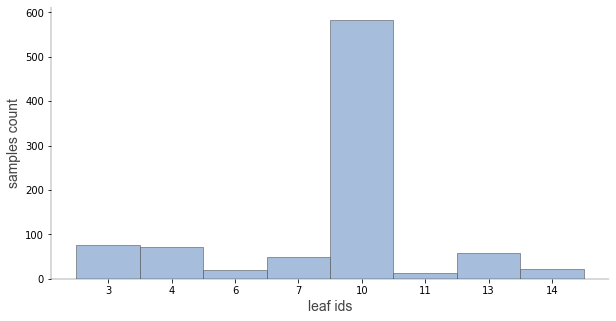

In [54]:
treeviz.viz_leaf_samples(sk_dtree_reg)

### viz_leaf_criterion

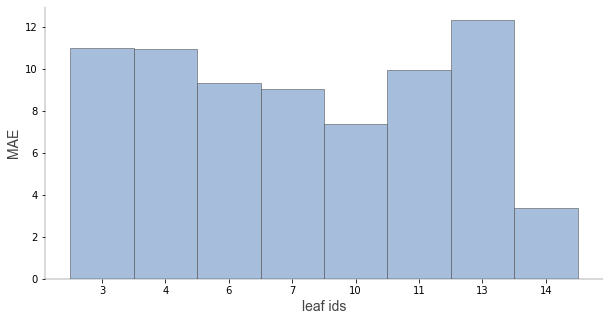

In [55]:
treeviz.viz_leaf_criterion(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

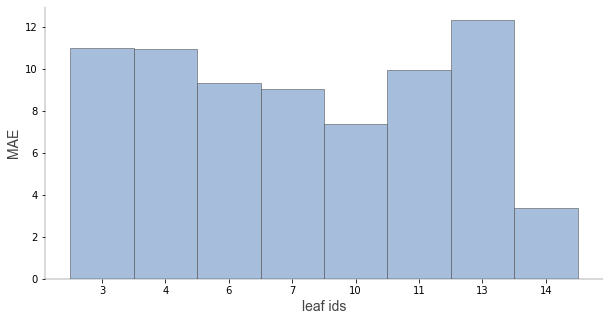

In [56]:
treeviz.viz_leaf_criterion(sk_dtree_reg)

### viz_leaf_target

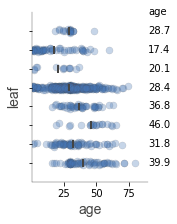

In [67]:
treeviz.viz_leaf_target(dtr, dataset[features_reg], dataset[target_reg], features_reg, target_reg)

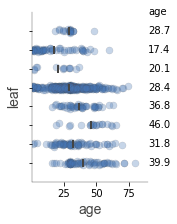

In [68]:
treeviz.viz_leaf_target(sk_dtree_reg)

### describe_node_sample

In [77]:
treeviz.describe_node_sample(dtr, 1, dataset[features], features_reg)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.0,37.048118,84.154687,0.564815,54.773148,1.175926
std,0.0,14.046369,78.380373,0.496933,43.781906,0.996073
min,1.0,0.920000,0.000000,0.000000,-1.000000,-1.000000
25%,1.0,29.000000,30.923950,0.000000,13.750000,0.000000
50%,1.0,35.000000,60.287500,1.000000,53.500000,2.000000
75%,1.0,47.250000,93.500000,1.000000,91.250000,2.000000
max,1.0,80.000000,512.329200,1.000000,146.000000,2.000000


In [78]:
treeviz.describe_node_sample(sk_dtree_reg, node_id=1)

,Pclass,Fare,Sex_label,Cabin_label,Embarked_label,Survived
count,216.0,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.0,84.154687,0.564815,54.773148,1.175926,0.629630
std,0.0,78.380373,0.496933,43.781906,0.996073,0.484026
min,1.0,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,1.0,30.923950,0.000000,13.750000,0.000000,0.000000
50%,1.0,60.287500,1.000000,53.500000,2.000000,1.000000
75%,1.0,93.500000,1.000000,91.250000,2.000000,1.000000
max,1.0,512.329200,1.000000,146.000000,2.000000,1.000000


### explain_prediction_path

In [82]:
treeviz.explain_prediction_path(dtr, dataset[features_reg].iloc[10], "plain_english", dataset[features_reg], dataset[target_reg], features_reg, target_reg)

1.5 <= Pclass
Fare < 27.82
139.5 <= Cabin_label


In [83]:
treeviz.explain_prediction_path(sk_dtree_reg, dataset[features_reg].iloc[10], "plain_english")

1.5 <= Pclass
Fare < 27.82
139.5 <= Cabin_label


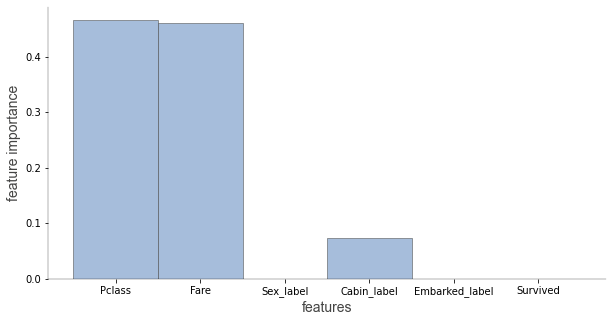

In [84]:
treeviz.explain_prediction_path(dtr, dataset[features_reg].iloc[10], "sklearn_default", dataset[features_reg], dataset[target_reg], features_reg, target_reg)

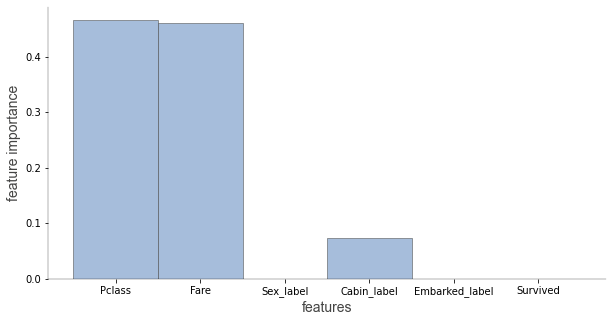

In [85]:
treeviz.explain_prediction_path(sk_dtree_reg, dataset[features_reg].iloc[10], "sklearn_default")

### rtreeviz_univar

In [21]:
features_reg_univar = ["Pclass"]
target_reg = "Age"
dtr_univar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_univar.fit(dataset[features_reg_univar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [23]:
skdtree_univar = SKDTree(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)

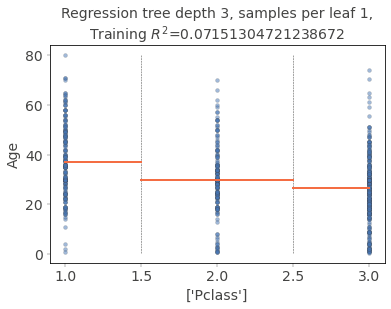

In [149]:
treeviz.rtreeviz_univar(dtr_univar, dataset[features_reg_univar], dataset[target_reg], features_reg_univar, target_reg)


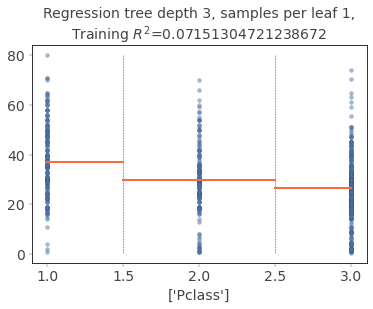

In [24]:
treeviz.rtreeviz_univar(skdtree_univar)

### rtreeviz_bivar_3D

In [16]:
features_reg_bivar = ["Age", "Fare"]
target_reg = "Pclass"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [17]:
skdtree_bivar = SKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

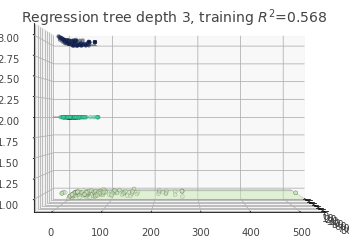

In [18]:
treeviz.rtreeviz_bivar_3D(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)


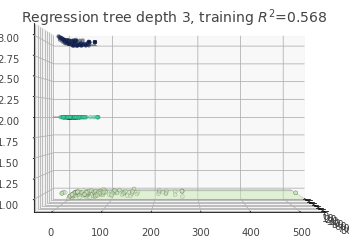

In [20]:
treeviz.rtreeviz_bivar_3D(skdtree_bivar)

### rtreeviz_bivar_heatmap

In [8]:
features_reg_bivar = ["Pclass", "Fare"]
target_reg = "Age"
dtr_bivar = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="mae")
dtr_bivar.fit(dataset[features_reg_bivar], dataset[target_reg])


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [9]:
skdtree_bivar = SKDTree(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

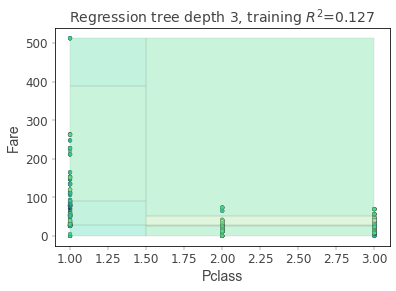

In [11]:
treeviz.rtreeviz_bivar_heatmap(dtr_bivar, dataset[features_reg_bivar], dataset[target_reg], features_reg_bivar, target_reg)

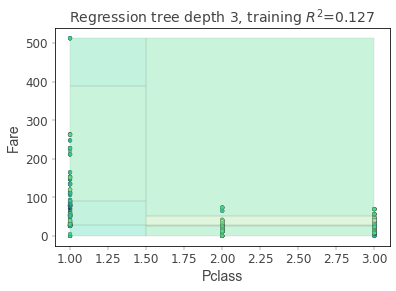

In [14]:
treeviz.rtreeviz_bivar_heatmap(skdtree_bivar)